# Conceptualization and Verification of Maximum Stress Criterion

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="farfieldstress.png" width="500"/>

In [2]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
tau_fps

## Representation of Far field stress in terms of Stress Intensity factors
In this implementation, the far field stress is represented in  terms of Stress Intensity factors (SIFs) where $K_I$ represents mode I and $K_{II}$ depicts mode II. This terminology of measuring stresses in SIFs for external stress acting in uniaxial direction is shown as:
\begin{gather*}
K_I = \sigma_x \sqrt{\pi a}\sin^2 \beta  \\
K_{II} = \sigma_x \sqrt{\pi a}\sin\beta \cos\beta  
\end{gather*}
The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. $\beta$ represents the angle of crack orientation with respect to the vertical direction and $a$ represents the length of crack as depicted in figure. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [3]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

In [4]:
K_I = sigma_x * sp.sqrt(sp.pi * a) * s_b**2
K_II  = sigma_x * sp.sqrt(sp.pi * a) * c_b * s_b
K_I, K_II

In [5]:
params1 = {beta:45*np.pi/180}

In [6]:
K_I_ = K_I#.subs(params)
K_II_ = K_II#.subs(params)
K_I_, K_II_

In [7]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [8]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

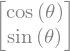

In [9]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

## Stress Equation
Dominant term for stresses can be obtained as:
\begin{gather*}
\sigma_{ij} = \frac{\left[ K_I S_{ij}^I(\theta) + K_{II} S_{ij}^{II}(\theta) \right]}{\sqrt{2\pi r}}
\end{gather*}
where $K_I$, $K_{II}$ represents the Stress Intensity Factors for Mode I and Mode II failures and $S^I_{ij}(\theta)$ , $S_{ij}^{II}(\theta)$ depicts the Angular functions for Mode I and Mode II which are given as:
Angular functions for Mode I:
\begin{align}
S^{I} = 
\left[
\begin{array}{cc}
S^{I}_{11} & S^{I}_{12} \\
S^{I}_{12} &  S^{I}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
2 \cos\frac{\theta}{2} -\cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] & \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} \\
\cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} &  \cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right]
\end{array}
\right] 
\end{align}
Angular functions for Mode II:
\begin{align}
S^{II} = 
\left[
\begin{array}{cc}
S^{II}_{11} & S^{II}_{12} \\
S^{II}_{12} &  S^{II}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
-2 \sin\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2} & \cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] \\
\cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] &  \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2}
\end{array}
\right] 
\end{align}

## Angular Function

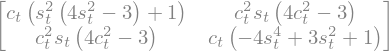

In [10]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)
S_I_

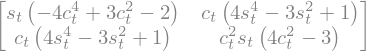

In [11]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)
S_II_

## Stress Equation at the Crack tip in Cartesian Coordinates

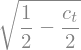

In [12]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)
s_t_h

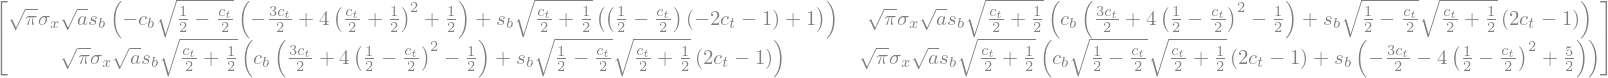

In [13]:
sigma = sp.Matrix([[K_I_ * S_I_[0,0] + K_II_ * S_II_[0,0], K_I_ * S_I_[0,1] + K_II_ * S_II_[0,1]],
                   [K_I_ * S_I_[0,1] + K_II_ * S_II_[0,1], K_I_ * S_I_[1,1] + K_II_ * S_II_[1,1]]])
sigma_ = sp.simplify(sigma)
sigmaa = sigma_.subs(c_t, c_t_h).subs(s_t, s_t_h)
sigmaa

## Stress Transformation from Cartesian to Polar Coordinates
To transform from cartesian to polar coordinates, Transformation Matrix will be taken into account i.e.:
\begin{align}
T_t = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{align}
Now, in order to transform from cartesian to polar the following transformation will be done. i.e.:
\begin{align}
\sigma_t = T_t^T \sigma_{ij} T_t 
\end{align}

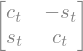

In [14]:
T_t = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
T_t

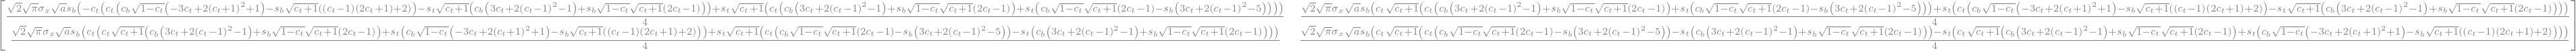

In [15]:
sig_p = T_t.T * sigmaa * T_t
sig_sim = sp.simplify(sig_p)
sig_sim

Replacing sine component with cosine for transforming the equation into a single trignometric ratio for simpicity.

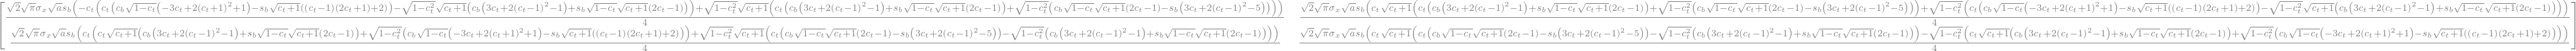

In [16]:
s_t_ = sp.sqrt(1 - c_t**2)
sig = sig_sim.subs(s_t, s_t_)
sig

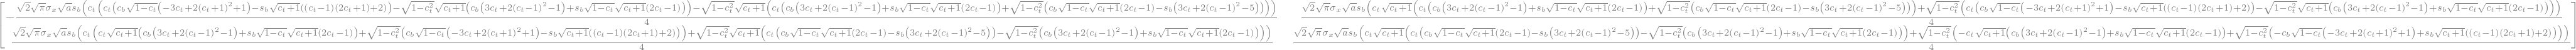

In [17]:
sig_ = sp.simplify(sig)
sig_

Solving the stress field to calculate angle $\theta$ following the Maximum Tangential Stress Theory. According to the Maximum Tangental Stress Theory, when the stress $\sigma_{\theta \theta}$ is maximum depicting principal stress than $\sigma_{r \theta}$ becomes:  
\begin{gather*}
\sigma_{r \theta} = 0
\end{gather*}

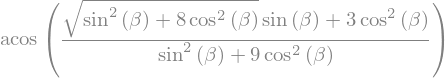

In [18]:
theta_sol = sp.solve(sig_[1,0], c_t)
theta_val = theta_sol[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_ = sp.acos(theta_val)
theta_

In [19]:
get_theta = sp.lambdify((beta), theta_, 'numpy')
get_theta

<function _lambdifygenerated(Dummy_172)>

<IPython.core.display.Javascript object>


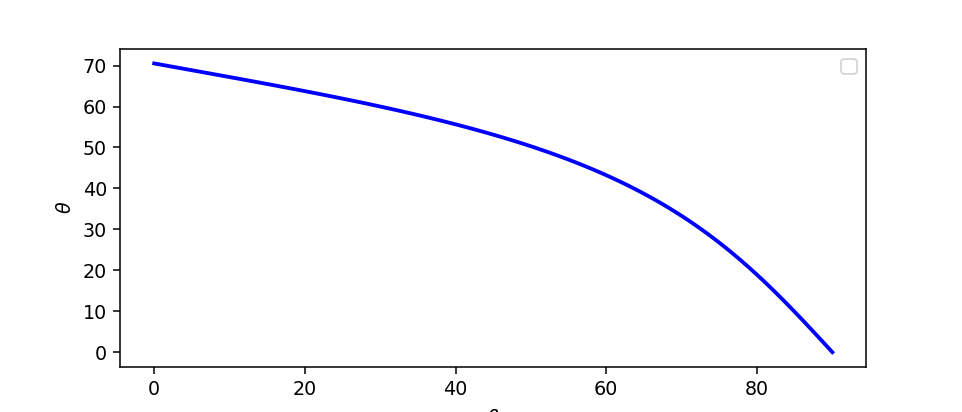

No handles with labels found to put in legend.


In [20]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta = np.linspace(0, 90 * np.pi/180, 100)
theta = get_theta(beta) 
ax1.plot(beta * 180/np.pi, theta * 180/ np.pi, color='blue', lw=2)
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()

In [21]:
theta * 180/ np.pi 

array([70.52877937, 70.22600982, 69.9236718 , 69.62163091, 69.31975326,
       69.01790532, 68.71595362, 68.4137646 , 68.11120437, 67.80813847,
       67.50443166, 67.1999477 , 66.89454913, 66.58809701, 66.28045073,
       65.97146774, 65.6610033 , 65.34891025, 65.03503873, 64.71923593,
       64.4013458 , 64.08120876, 63.75866143, 63.43353627, 63.10566131,
       62.77485977, 62.44094973, 62.10374375, 61.7630485 , 61.41866433,
       61.07038485, 60.71799648, 60.361278  , 60.        , 59.63392441,
       59.2628039 , 58.88638133, 58.5043891 , 58.11654851, 57.7225691 ,
       57.32214785, 56.91496848, 56.5007006 , 56.07899884, 55.64950198,
       55.21183197, 54.7655929 , 54.31036997, 53.84572838, 53.3712121 ,
       52.8863427 , 52.39061802, 51.88351085, 51.36446753, 50.83290649,
       50.28821676, 49.72975645, 49.15685117, 48.5687925 , 47.96483636,
       47.34420146, 46.70606786, 46.04957548, 45.37382282, 44.67786585,
       43.96071711, 43.22134512, 42.45867421, 41.67158482, 40.85

In [22]:
beta * 180/np.pi

array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
        4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
        9.09090909, 10.        , 10.90909091, 11.81818182, 12.72727273,
       13.63636364, 14.54545455, 15.45454545, 16.36363636, 17.27272727,
       18.18181818, 19.09090909, 20.        , 20.90909091, 21.81818182,
       22.72727273, 23.63636364, 24.54545455, 25.45454545, 26.36363636,
       27.27272727, 28.18181818, 29.09090909, 30.        , 30.90909091,
       31.81818182, 32.72727273, 33.63636364, 34.54545455, 35.45454545,
       36.36363636, 37.27272727, 38.18181818, 39.09090909, 40.        ,
       40.90909091, 41.81818182, 42.72727273, 43.63636364, 44.54545455,
       45.45454545, 46.36363636, 47.27272727, 48.18181818, 49.09090909,
       50.        , 50.90909091, 51.81818182, 52.72727273, 53.63636364,
       54.54545455, 55.45454545, 56.36363636, 57.27272727, 58.18181818,
       59.09090909, 60.        , 60.90909091, 61.81818182, 62.72

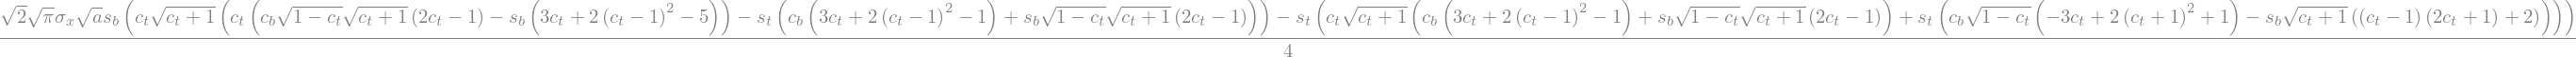

In [23]:
sig_sim[1,1]

## R-Curve
The fracture of quasi-brittle materials can be depicted by an R-curve which is also termed as fracture resistance. R-Curve is an envelope of energy release rate. For quasi-brittle materials, R is an increasing and convex function. This curve may be dependent on specimen geometry and material. 
A figure shown below highlights that the convex envelope of R-curve serves as the limit for crack gorwth, beyond which the unstable crack grows.


<img src="Rcurve.png" width="500"/>

For an infinite size specimen, the energy release rate is given by:
\begin{gather*}
G = \frac{\sigma^2 \pi a f_1^2}{E}
\end{gather*}
where, $\sigma = \frac{Ps}{b^2}$ for three point bending beam, $a$, $E$ represent the crack length and the modulus of elasticity respectively. The term $f_1$ in $\alpha$ equation is a geometry factor for the stress intensity factor and its value is equal to 1.123 for three point beam.

In [24]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
alpha = sp.Symbol('alpha', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)

In [25]:
params = {sigma_x : 5, #N/mm2 
          f_2 : 1.42, 
          E: 26720, #N/mm2
          P_max : 9720, #N 
          D : 500, #mm
          H_0 : 3, #mm
          B : 196, #mm
          pi : 3.14, 
          a_0: 50, #mm
          f_1: 1.123
         }

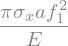

In [26]:
G = (sigma_x * pi * a * f_1**2)/E
G

In [27]:
G_ = G.subs(params)
G_

In [28]:
get_G = sp.lambdify((a), G_, 'numpy')
get_G

<function _lambdifygenerated(a)>

With reference to Shah, the Crack Mouth Opening Displacement can be calculated as follows:
\begin{gather*}
CMOD = \frac{4 \sigma f_2}{E}
\end{gather*}

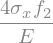

In [29]:
CMOD = (4 * sigma_x * f_2) / E
CMOD

The critical effective crack length can be taken from:
\begin{gather*}
a_i = \frac{2}{\pi}(D + H_0) \arctan{\sqrt{\frac{B E C_{si}}{32.6} - 0.1135}} - H_0
\end{gather*}
where, $C_{si}$ is the secant compliance at any crack propagation. The critical effective crack length $a_c$ can be derived by setting:
\begin{gather*}
C_{si}= \frac{CMOD_c}{P_{max}}
\end{gather*}

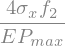

In [30]:
C_si = CMOD / P_max
C_si

In [31]:
C_si_ = C_si.subs(params)
C_si_

In [32]:
a_c =  (2/pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si_)/(32.6)-0.1135)) - H_0
a_c_ = a_c.subs(params)
a_c_

For the case, when critical crack mouth opening displacement $CMOD_c$ is known from experiment, the crack opening displacement $COD$ can be obtained from the equation given by Jenq and Shah:
\begin{gather*}
COD = CMOD_c\left[\left(1 - \frac{x}{a_c}\right)^2 + \left(1.081 - 1.149 \left(\frac{a_c}{D}\right)\right)\left[\frac{x}{a_c} - \left(\frac{a_0}{a_c}\right)^2\right]\right]^{1/2} 
\end{gather*}
In order to obtain the $COD_c$ at the tip of the crack we will replace $x$ with $a_0$. 

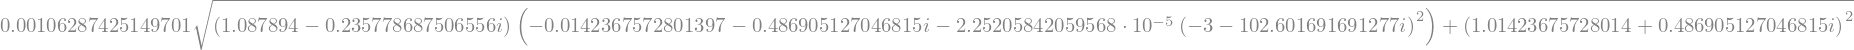

In [33]:
COD = CMOD * sp.sqrt((1 - a_0/a_c_)**2 + (1.081 - 1.149*(a_c_/D))*(a_0/a_c_ - (a_0/a_c_)**2))
COD_ = COD.subs(params)
COD_

In order to obtain R-Curve the following equation is to be evaluated:
\begin{gather*}
R = \beta_2 \psi (a - a_0)^{d_{2}}
\end{gather*}
The value of $\psi$ is normally close to one, hence it can be ignored whereas to calculate factor $\beta_2$ two critical conditions have to be considered i.e. $K_I = K_{IC}$ and $COD = CTOD_c$. Therefore, with reference to Maximum Tangential Stress Criterion $K_{IC}$ will be calculated as:
\begin{gather*}
K_{Ic} = \sigma_x \sqrt{\pi a}\sin^2 \beta
\end{gather*}

In [34]:
par = {s_b : 1}
K_Ic = K_I.subs(par)
K_Ic

With reference to Shah, the value of $\beta_2$ can be calculated as:
\begin{gather*}
\beta_2 = \frac {K_{Ic}^2 (\alpha a_0 - a_0)^{-d_2}}{E \left(1 - \frac{d_2 - \frac{\alpha - 1}{\alpha}}{d_1 - \frac{\alpha - 1}{\alpha}} \right)}
\end{gather*}
and the unknown terms $\alpha$, $d_{1,2}$ in the above equation can be obtained from:
\begin{gather*}
\alpha = \frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + \sqrt {\frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + 1} \\
d_{1,2} = \frac{1}{2} + \frac{\alpha - 1} {\alpha} \pm \sqrt{\left(\frac{1}{4} + \frac{\alpha - 1} {\alpha} - \left(\frac{\alpha - 1} {\alpha}\right)^2\right)}
\end{gather*}
where, $f_2$ is a geometry parameter ad is equal to 1.42 for three point bend beam. $\alpha$ is the precritical stable crack growth ($\alpha \geq 1$). It is equal to 1 for a pure brittle material whereas it is greater than 1 for quasi-brittle materials. 

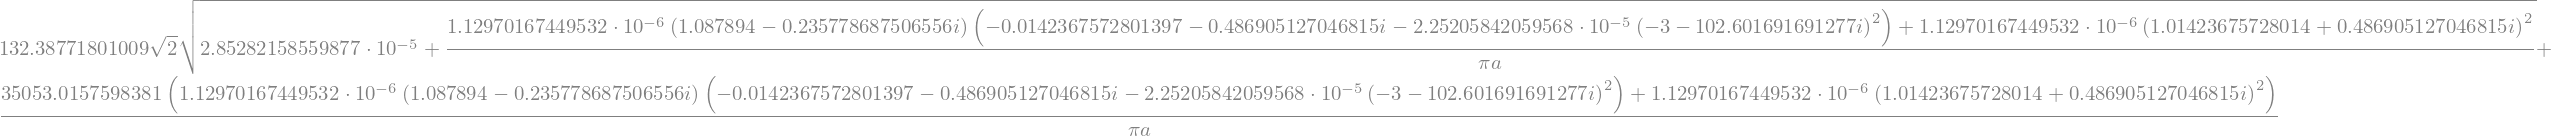

In [35]:
alpha = (pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_ = alpha.subs(params)
alpha_

In [36]:
get_alpha = sp.lambdify((a), alpha_, 'numpy')
get_alpha

<function _lambdifygenerated(a)>

In [37]:
d_1 = (1/2) + ((alpha - 1) / alpha) + sp.sqrt(1/4 + (alpha - 1) / alpha - ((alpha - 1) / alpha)**2)
d_2 = (1/2) + ((alpha - 1) / alpha) - sp.sqrt(1/4 + (alpha - 1) / alpha - ((alpha - 1) / alpha)**2)
d_1_ = d_1.subs(params) 
d_2_ = d_2.subs(params)

In [38]:
get_d_1 = sp.lambdify((a), d_1_, 'numpy')
get_d_1

<function _lambdifygenerated(a)>

In [39]:
get_d_2 = sp.lambdify((a), d_2_, 'numpy')
get_d_2

<function _lambdifygenerated(a)>

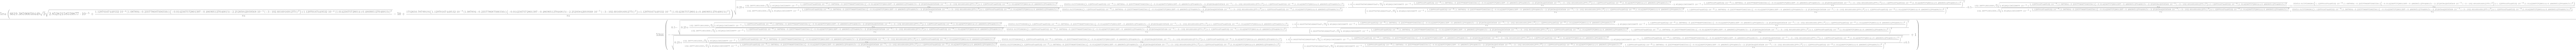

In [40]:
beta_2 = (K_Ic**2 * (alpha * a_0 - a_0)**-d_2) / (E * (1 - (d_2 - ((alpha-1)/alpha))/(d_1 - ((alpha-1)/alpha))))
beta_2_ = beta_2.subs(params)
beta_2_

In [41]:
get_beta_2 = sp.lambdify((a), beta_2_, 'numpy')
get_beta_2

<function _lambdifygenerated(a)>

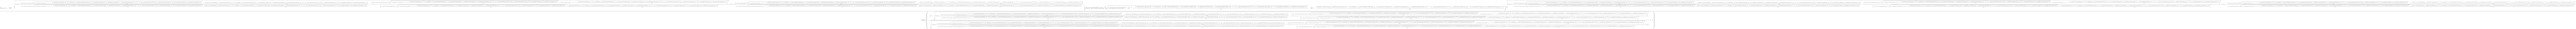

In [42]:
R = beta_2 * (a - a_0)**d_2
R_ = R.subs(params)
R_

In [43]:
get_R = sp.lambdify((a), R_, 'numpy')
get_R

<function _lambdifygenerated(a)>

The value of R must not exceed its maximum value which is:
\begin{gather*}
R_{Ic} = \frac{K_{Ic}^2}{E}
\end{gather*}

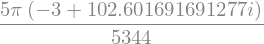

In [44]:
R_Ic = (K_Ic)**2 / E
R_Ic_ =R_Ic.subs(a, a_c_).subs(params)
R_Ic_

In [45]:
#get_R_Ic = sp.lambdify((s_b), R_Ic_, 'numpy')
#get_R_Ic

<IPython.core.display.Javascript object>


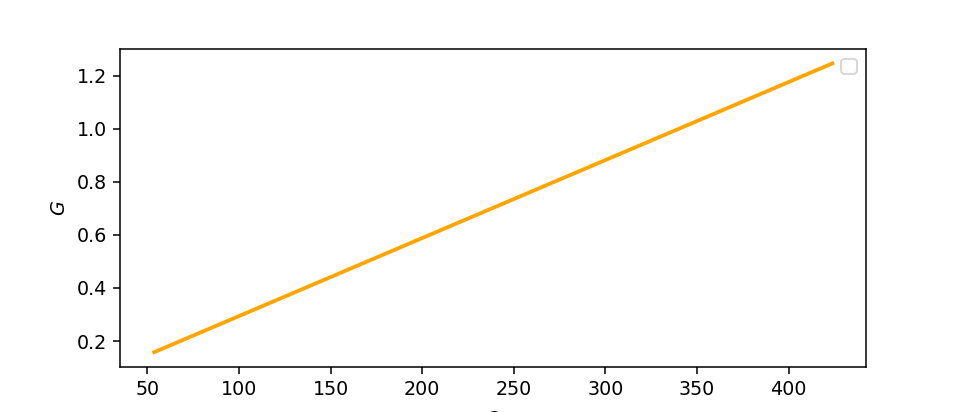

<string>:2: RuntimeWarning: invalid value encountered in power
C:\Users\Fahad\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [46]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
a = np.linspace(50, 423.93, 100)
a_g = np.linspace(0, 423.93, 100)
s_b = 0.5
R = get_R(a) 
#R_ic = get_R_Ic(s_b)
G = get_G(a_g)
ax1.plot(a , R, color='orange', lw=2)
#ax1.plot(a_g , G, color='blue', lw=2)
#ax1.plot(a , R_ic, color='yellow', lw=2)
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$G$')
ax1.legend()

In [47]:
G

array([0.        , 0.00317308, 0.00634617, 0.00951925, 0.01269234,
       0.01586542, 0.01903851, 0.02221159, 0.02538468, 0.02855776,
       0.03173085, 0.03490393, 0.03807702, 0.0412501 , 0.04442319,
       0.04759627, 0.05076936, 0.05394244, 0.05711552, 0.06028861,
       0.06346169, 0.06663478, 0.06980786, 0.07298095, 0.07615403,
       0.07932712, 0.0825002 , 0.08567329, 0.08884637, 0.09201946,
       0.09519254, 0.09836563, 0.10153871, 0.1047118 , 0.10788488,
       0.11105797, 0.11423105, 0.11740413, 0.12057722, 0.1237503 ,
       0.12692339, 0.13009647, 0.13326956, 0.13644264, 0.13961573,
       0.14278881, 0.1459619 , 0.14913498, 0.15230807, 0.15548115,
       0.15865424, 0.16182732, 0.16500041, 0.16817349, 0.17134657,
       0.17451966, 0.17769274, 0.18086583, 0.18403891, 0.187212  ,
       0.19038508, 0.19355817, 0.19673125, 0.19990434, 0.20307742,
       0.20625051, 0.20942359, 0.21259668, 0.21576976, 0.21894285,
       0.22211593, 0.22528902, 0.2284621 , 0.23163518, 0.23480